In [93]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np 
import soundfile

# Part 1

[[156 159 158 ... 151 152 152]
 [160 154 157 ... 154 155 153]
 [156 159 158 ... 151 152 152]
 ...
 [114 132 123 ... 135 137 114]
 [121 126 130 ... 133 130 113]
 [121 126 130 ... 133 130 113]]


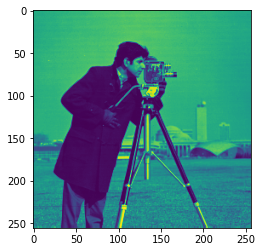

In [4]:
Cameraman_image = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/cameraman.tif',1)
print(Cameraman_image)
plt.figure() 
plt.imshow(Cameraman_image)

[[78.  79.5 79.  ... 75.5 76.  76. ]
 [80.  77.  78.5 ... 77.  77.5 76.5]
 [78.  79.5 79.  ... 75.5 76.  76. ]
 ...
 [57.  66.  61.5 ... 67.5 68.5 57. ]
 [60.5 63.  65.  ... 66.5 65.  56.5]
 [60.5 63.  65.  ... 66.5 65.  56.5]]


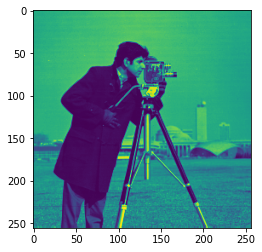

In [5]:
fade_factor=0.5
Fade_image = Cameraman_image * fade_factor
print(Fade_image)
plt.figure() 
plt.imshow(Fade_image)

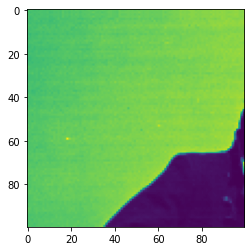

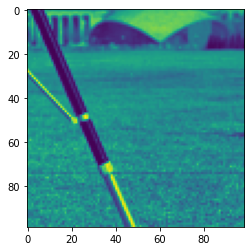

In [49]:
First_part_image = Cameraman_image[:100,:100]
plt.figure() 
plt.imshow(First_part_image)
last_part_image = Cameraman_image[-101:-1,-101:-1]
plt.figure() 
plt.imshow(last_part_image)

# Part2 version1

[[144 160 144 ...  73  71  76]
 [144 160 144 ...  73  71  76]
 [142 151 144 ...  67  66  78]
 ...
 [129 127 133 ... 131 146 135]
 [111 127 127 ... 137 146 142]
 [133 131 133 ... 138 149 149]]


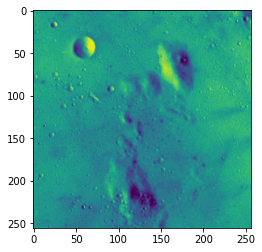

In [51]:
Moon_image = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/5.1.09.tiff',1)
plt.figure() 
plt.imshow(Moon_image)

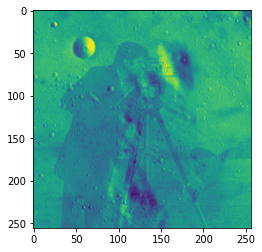

In [52]:
factor1=0.8
Moon_imageby = Moon_image * factor1
factor2 = 0.2
Cameraman_imageby = Cameraman_image * factor2
Mixte_image = Moon_imageby + Cameraman_imageby
plt.figure() 
plt.imshow(Mixte_image)

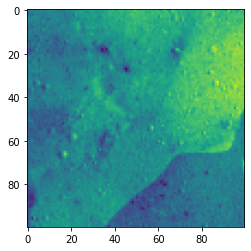

In [54]:
First_part_image_1 = Cameraman_image[:100,:100]
last_part_image_2 = Moon_image[-101:-1,-101:-1]
last_part_Mixted_image = First_part_image_1 * 0.2 + last_part_image_2 * 0.8
plt.figure() 
plt.imshow(last_part_Mixted_image)

# Part2 version2

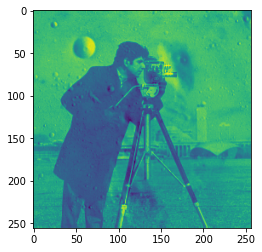

In [80]:
Cameraman_reshape= np.reshape(Cameraman_image, (65536, 1))
Moon_reshape= np.reshape(Moon_image, (65536, 1))
Both_images = np.hstack((Cameraman_reshape, Moon_reshape))
Fade_vector = [[0.5],[0.5]]
mixing_image_vector = np.dot(Both_images, Fade_vector)
mixing_image_mtarix = np.reshape(mixing_image_vector, (256, 256))
plt.figure() 
plt.imshow(mixing_image_mtarix)

# Exercise 2: Quantization

In [112]:
p, samplerate = soundfile.read('/content/drive/MyDrive/Colab Notebooks/filename1.wav')
soundfile.write('/content/drive/MyDrive/Colab Notebooks/filename2.wav', p, samplerate, subtype='PCM_U8')
p1, samplerate = soundfile.read('/content/drive/MyDrive/Colab Notebooks/filename2.wav')
p2 = [(x>0)+0.0 for x in p1]
soundfile.write('/content/drive/MyDrive/Colab Notebooks/filename3.wav', p2, samplerate)

**Observations:** The intuitive feeling of listening to the three audio waves is that as the bit rate decreases, there are more and more noises in the audio, and the audio sounds more and more noisy. In fact, we can easily see the result from the unit of bits/sample. The higher the bit rate, the larger the transmitted data and the better the sound quality.

# Exercise 3: Aliasing Effect

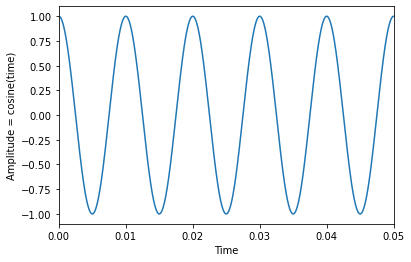

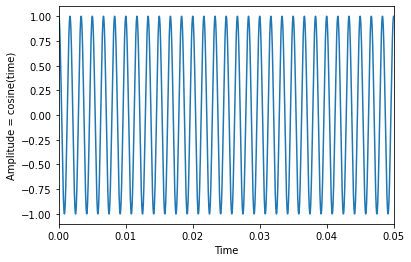

In [143]:
t = np.arange(0, 10, 0.00002)
x1 = np.cos(2*np.pi*100*t)
x2 = np.cos(2*np.pi*600*t)

plt.figure(1)
plt.plot(t,x1)
plt.xlabel('Time')
plt.ylabel('Amplitude = cosine(time)')
plt.xlim(0, 0.05)
plt.show()

plt.figure(2)
plt.plot(t,x2)
plt.xlabel('Time')
plt.ylabel('Amplitude = cosine(time)')
plt.xlim(0, 0.05)
plt.show()

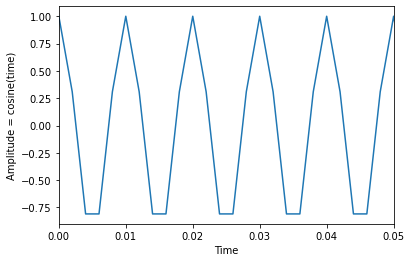

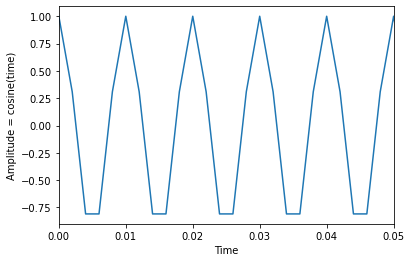

In [145]:
Fs = 500;
tt = np.arange(0, 10, 1/Fs)
x11 = np.cos(2*np.pi*100*tt);
x22 = np.cos(2*np.pi*600*tt);

plt.figure(1),
plt.plot(tt,x11);
plt.xlim(0, 0.05)
plt.xlabel('Time')
plt.ylabel('Amplitude = cosine(time)')
plt.show()

plt.figure(2),
plt.plot(tt,x22);
plt.xlim(0, 0.05)
plt.xlabel('Time')
plt.ylabel('Amplitude = cosine(time)')
plt.show()

**Observation:** I reduced the x-axis of the picture a little to make it easier to observe the change of the cos function curve. By comparing the above printed pictures, we can easily see that before sample filtering, we can easily distinguish the difference between 100Hz and 600Hz waves, but after 500Hz sampling, the two are almost the same. Before there is no sampling, we can clearly see that the cos wave of high frequency is significantly more compact.